<a href="https://colab.research.google.com/github/efemeryczny/network_analysis_wig/blob/main/stooq_tickers_webscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import bibliotek oraz łączenie z dyskiem

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Create an empty list to store the ticker data
ticker_data = []

# Iterate over the range of URLs
for i in range(1, 8):
    # Construct the URL for each page
    url = f"https://stooq.pl/q/i/?s=wig&l={i}"

    # Read the HTML table and extract ticker data
    wig = pd.read_html(url)[1]
    wig_tickery = wig.iloc[5:-1, :]
    lista_symboli = wig_tickery.drop(wig_tickery.columns[-1], axis=1)

    # Drop rows with missing values (NaN)
    #lista_symboli.dropna(inplace=True)

    # Get the values from the first column and remove NaN and empty strings
    first_column = lista_symboli.iloc[:, 0].tolist()
    #first_column = [value for value in first_column if isinstance(value, str) and value.strip() != '']

    # Append the ticker data to the list
    ticker_data.extend(first_column)

# Print the ticker data
print(ticker_data)
len(ticker_data)

['06N', '11B', '1AT', '3RG', 'AAT', 'ABE', 'ABS', 'ACG', 'ACP', 'ACT', 'ADV', 'AGO', 'AGT', 'ALE', 'ALG', 'ALI', 'ALL', 'ALR', 'AMB', 'AMC', 'ANR', 'APE', 'APN', 'APR', 'APT', 'ARH', 'ART', 'ASB', 'ASE', 'AST', 'ATC', 'ATD', 'ATG', 'ATP', 'ATR', 'ATS', 'ATT', 'AWM', 'B24', 'BBD', 'BBT', 'BCM', 'BCS', 'BCX', 'BDX', 'BDZ', 'BFT', 'BHW', 'BIO', 'BIP', 'BMC', 'BMX', 'BNP', 'BOS', 'BOW', 'BRS', 'CAR', 'CAV', 'CBF', 'CCC', 'CDL', 'CDR', 'CEZ', 'CIG', 'CLC', 'CLD', 'CLE', 'CLN', 'CMP', 'CMR', 'COG', 'CPD', 'CPL', 'CPR', 'CPS', 'CRI', 'CRJ', 'CRM', 'CSR', 'CTS', 'CTX', 'DAD', 'DAT', 'DBE', 'DCR', 'DEK', 'DEL', 'DGE', 'DIG', 'DNP', 'DOM', 'DPL', 'DVL', 'EAH', 'EAT', 'ECH', 'EHG', 'EKP', 'ELT', 'ELZ', 'ENA', 'ENE', 'ENI', 'ENT', 'ERB', 'ERG', 'ETL', 'EUR', 'FAB', 'FEE', 'FER', 'FMG', 'FON', 'FRO', 'FSG', 'FTE', 'GEA', 'GIF', 'GKI', 'GMT', 'GOP', 'GPP', 'GPW', 'GRN', 'GRX', 'GTC', 'GTN', 'HDR', 'HEL', 'HRP', 'HUG', 'ICE', 'IFC', 'IFI', 'IIA', 'IMC', 'IMS', 'INC', 'ING', 'INK', 'INL', 'INP', 'IPE'

331

In [12]:
ticker = ("[{0}]".format(', '.join(map(str, ticker_data))))
print(ticker)

[06N, 11B, 1AT, 3RG, AAT, ABE, ABS, ACG, ACP, ACT, ADV, AGO, AGT, ALE, ALG, ALI, ALL, ALR, AMB, AMC, ANR, APE, APN, APR, APT, ARH, ART, ASB, ASE, AST, ATC, ATD, ATG, ATP, ATR, ATS, ATT, AWM, B24, BBD, BBT, BCM, BCS, BCX, BDX, BDZ, BFT, BHW, BIO, BIP, BMC, BMX, BNP, BOS, BOW, BRS, CAR, CAV, CBF, CCC, CDL, CDR, CEZ, CIG, CLC, CLD, CLE, CLN, CMP, CMR, COG, CPD, CPL, CPR, CPS, CRI, CRJ, CRM, CSR, CTS, CTX, DAD, DAT, DBE, DCR, DEK, DEL, DGE, DIG, DNP, DOM, DPL, DVL, EAH, EAT, ECH, EHG, EKP, ELT, ELZ, ENA, ENE, ENI, ENT, ERB, ERG, ETL, EUR, FAB, FEE, FER, FMG, FON, FRO, FSG, FTE, GEA, GIF, GKI, GMT, GOP, GPP, GPW, GRN, GRX, GTC, GTN, HDR, HEL, HRP, HUG, ICE, IFC, IFI, IIA, IMC, IMS, INC, ING, INK, INL, INP, IPE, IPO, IZB, IZO, IZS, JSW, KCI, KGH, KGN, KMP, KOM, KPD, KPL, KRK, KRU, KSG, KTY, KVT, LBT, LBW, LEN, LES, LKD, LPP, LRQ, LSI, LTX, LWB, MAB, MAK, MBK, MBR, MBW, MCI, MCR, MDG, MDI, MEX, MFO, MGT, MIL, MIR, MLG, MLK, MLS, MNC, MOC, MOJ, MOL, MON, MOV, MRB, MRC, MSP, MSW, MSZ, MVP, MXC,

In [14]:
urls = []
for company in ticker_data:
  url = f'https://stooq.pl/q/h/?s={company}'
  urls.append(url)

urls

['https://stooq.pl/q/h/?s=06N',
 'https://stooq.pl/q/h/?s=11B',
 'https://stooq.pl/q/h/?s=1AT',
 'https://stooq.pl/q/h/?s=3RG',
 'https://stooq.pl/q/h/?s=AAT',
 'https://stooq.pl/q/h/?s=ABE',
 'https://stooq.pl/q/h/?s=ABS',
 'https://stooq.pl/q/h/?s=ACG',
 'https://stooq.pl/q/h/?s=ACP',
 'https://stooq.pl/q/h/?s=ACT',
 'https://stooq.pl/q/h/?s=ADV',
 'https://stooq.pl/q/h/?s=AGO',
 'https://stooq.pl/q/h/?s=AGT',
 'https://stooq.pl/q/h/?s=ALE',
 'https://stooq.pl/q/h/?s=ALG',
 'https://stooq.pl/q/h/?s=ALI',
 'https://stooq.pl/q/h/?s=ALL',
 'https://stooq.pl/q/h/?s=ALR',
 'https://stooq.pl/q/h/?s=AMB',
 'https://stooq.pl/q/h/?s=AMC',
 'https://stooq.pl/q/h/?s=ANR',
 'https://stooq.pl/q/h/?s=APE',
 'https://stooq.pl/q/h/?s=APN',
 'https://stooq.pl/q/h/?s=APR',
 'https://stooq.pl/q/h/?s=APT',
 'https://stooq.pl/q/h/?s=ARH',
 'https://stooq.pl/q/h/?s=ART',
 'https://stooq.pl/q/h/?s=ASB',
 'https://stooq.pl/q/h/?s=ASE',
 'https://stooq.pl/q/h/?s=AST',
 'https://stooq.pl/q/h/?s=ATC',
 'https:

In [24]:
wig_table = []
for i, url in enumerate(urls):
  tables = pd.read_html(url)
  table = tables[1].copy()
  symbol = ticker_data[i] #wig_banki
  table.loc[:, 'ticker'] = symbol #table['company'] = ticker
  wig_table.append(table)

In [25]:
tabele_razem=pd.concat(wig_table)
tabele_razem

,Lp,Akcjonariusz,Udział w kapitale,Liczba akcji,Ostatnia zmiana,Wartość rynkowa (PLN),Udział na WZA,Liczba głosów,Ostatnia zmiana.1,Data aktualizacji,ticker
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06N
1,NaN,"Ulubione GPW, WIG20, Akcje Indeksy, Azja, Euro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06N
3,NaN,Market On-line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06N
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06N
...,...,...,...,...,...,...,...,...,...,...,...
11,· Cena nominalna akcji: 0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZUK
12,· Free Float: 26.73%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZUK
13,"· Liczba wszystkich akcji: 6,503,790 akcji",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZUK
14,· Akcje uprzywilejowane co do głosu: nie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZUK


In [26]:
tabele_razem_razem.dropna(inplace=True)
tabele_razem_razem

NameError: ignored

In [ ]:
excel_file_path = '/content/drive/MyDrive/Colab Notebooks/wig_dane/wig_dane_full.xlsx'
data = pd.read_excel(excel_file_path)
data

,Lp,shareholder,ownership,number_of_shares,Ostatnia zmiana,value,wza_ownership,Liczba gĹ‚osĂłw,Ostatnia zmiana.1,Data aktualizacji,ticker,spolka
0,1,PZU SA,31.91%,41658850.0,0.0,1.81 mld,31.91%,41658850.0,0.0,2022-11-04 00:00:00,ALR,ALIOR
1,2,OFE Nationale-Nederlanden,9.34%,12196509.0,-198000.0,531 mln,9.34%,12196509.0,-198000.0,2022-12-30 00:00:00,ALR,ALIOR
2,3,OFE Allianz Polska,8.83%,11526440.0,9607180.0,502 mln,8.83%,11526440.0,9607180.0,2023-05-16 00:00:00,ALR,ALIOR
3,4,OFE PKO BP Bankowy,4.76%,6209081.0,70943.0,270 mln,4.76%,6209081.0,70943.0,2022-12-30 00:00:00,ALR,ALIOR
4,5,OFE NNLife,3.45%,4502562.0,0.0,196 mln,3.45%,4502562.0,0.0,2022-12-30 00:00:00,ALR,ALIOR
...,...,...,...,...,...,...,...,...,...,...,...,...
1947,9,TFI Santander SA,0.05%,24232.0,0.0,521 tys,0.05%,24232.0,0.0,2022-12-31 00:00:00,ZEP,ZEPAK
1948,10,TFI BNP Paribas SA,0.04%,21692.0,0.0,466 tys,0.04%,21692.0,0.0,2022-12-31 00:00:00,ZEP,ZEPAK
1949,11,TFI Uniqa SA,0.01%,6429.0,-10775.0,138 tys,0.01%,6429.0,-10775.0,2022-12-31 00:00:00,ZEP,ZEPAK
1950,12,TFI PZU SA,0.01%,5900.0,0.0,127 tys,0.01%,5900.0,0.0,2022-12-31 00:00:00,ZEP,ZEPAK


In [29]:
#new_table = tabele_razem[tabele_razem['Lp'].str.isnumeric()]

# Convert the "Lp" column to numeric, coerce non-numeric values to NaN
tabele_razem['Lp'] = pd.to_numeric(tabele_razem['Lp'], errors='coerce')

# Filter the DataFrame based on numerical values in the "Lp" column
new_table = tabele_razem.dropna(subset=['Lp'])
new_table

,Lp,Akcjonariusz,Udział w kapitale,Liczba akcji,Ostatnia zmiana,Wartość rynkowa (PLN),Udział na WZA,Liczba głosów,Ostatnia zmiana.1,Data aktualizacji,ticker
5,1.0,RG Ventures Sp. z o.o,24.46%,3405807.0,0.0,12.9 mln,24.46%,3405807.0,0.0,24 lis 2023,06N
5,1.0,TFI Allianz Polska SA,9.51%,229878.0,0.0,126 mln,9.51%,229878.0,0.0,17 lis 2023,11B
6,2.0,Grzegorz Miechowski,6.97%,168413.0,0.0,92.3 mln,6.97%,168413.0,0.0,17 lis 2023,11B
7,3.0,OFE Nationale-Nederlanden,5.99%,144900.0,0.0,79.4 mln,5.99%,144900.0,0.0,17 lis 2023,11B
8,4.0,TFI Esaliens SA,5.74%,138671.0,332.0,76.0 mln,5.74%,138671.0,332.0,29 wrz 2023,11B
...,...,...,...,...,...,...,...,...,...,...,...
5,1.0,Fram FIZ,33.65%,2188592.0,0.0,6.24 mln,33.65%,2188592.0,0.0,29 lis 2023,ZUK
6,2.0,Stanisław Pargieła,11.42%,742800.0,0.0,2.12 mln,11.42%,742800.0,0.0,29 lis 2023,ZUK
7,3.0,Andrzej Pargieła,10.60%,689423.0,0.0,1.96 mln,10.60%,689423.0,0.0,29 lis 2023,ZUK
8,4.0,Artur Mączyński,9.79%,636896.0,0.0,1.82 mln,9.79%,636896.0,0.0,29 lis 2023,ZUK


In [ ]:
wig20tabela = pd.read_html('https://stooq.pl/t/?i=532')[1]
wig20 = wig20tabela.drop(wig20tabela.columns[-1], axis=1).dropna()
second_wig20 = wig20.iloc[:, 1].tolist()
print(second_wig20)

['ASSECOPOL', 'ALLEGRO', 'ALIOR', 'CDPROJEKT', 'CYFRPLSAT', 'DINOPL', 'JSW', 'KGHM', 'KRUK', 'KETY', 'LPP', 'MBANK', 'ORANGEPL', 'PEPCO', 'PEKAO', 'PGE', 'PKNORLEN', 'PKOBP', 'PZU', 'SANPL']


In [ ]:
wigbanki_tabela = pd.read_html('https://stooq.pl/q/i/?s=wig_banki')[1]
wigbanki_symbole = wigbanki_tabela.iloc[5:-1,:]
kolumna_1 = wigbanki_symbole.iloc[:, 0].tolist()
print(kolumna_1)

['ALR', 'BHW', 'BNP', 'BOS', 'GTN', 'ING', 'MBK', 'MIL', 'PEO', 'PKO', 'SAN', 'SPL', 'UCG']


In [ ]:
m40_tabela = pd.read_html('http://stooq.pl/q/i/?s=mwig40')[1]
m40 = m40_tabela.iloc[5:-1,:]
second_mwig40 = m40.iloc[:, 1].tolist()
print(second_mwig40)

['11BIT', 'AUTOPARTN', 'ASBIS', 'GRUPAAZOTY', 'BUDIMEX', 'BENEFIT', 'HANDLOWY', 'BUMECH', 'BIOMEDLUB', 'BNPPPL', 'INTERCARS', 'CCC', 'CIECH', 'COMARCH', 'DOMDEV', 'DEVELIA', 'AMREST', 'ENEA', 'EUROCASH', 'GRENEVIA', 'GRUPRACUJ', 'GPW', 'HUUUGE', 'INGBSK', 'KERNEL', 'PEP', 'LIVECHAT', 'BOGDANKA', 'MABION', 'MOBRUK', 'MILLENNIUM', 'NEUCA', 'PKPCARGO', 'SELVITA', 'STSHOLDING', 'TSGAMES', 'TAURONPE', 'WIRTUALNA', 'XTB', 'ZEPAK']


In [ ]:
from bs4 import BeautifulSoup
import requests
url = 'https://stooq.pl/q/i/?s=mwig40'  # Replace with the URL of the webpage containing the table
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('table', id='fth1')
#table = soup.find('table')
#df = pd.read_html(str(table))[1]

In [ ]:
mwig40tabela = pd.read_html('http://stooq.pl/q/i/?s=mwig40')[1]
mwig40tabela = mwig40tabela.iloc[5:-1, :]
mwig40 = mwig40tabela.drop(mwig40tabela.columns[-1], axis=1)
first_column = mwig40.iloc[:, 0].tolist()
print(first_column)

['11B', 'APR', 'ASB', 'ATT', 'BDX', 'BFT', 'BHW', 'BMC', 'BML', 'BNP', 'CAR', 'CCC', 'CIE', 'CMR', 'DOM', 'DVL', 'EAT', 'ENA', 'EUR', 'GEA', 'GPP', 'GPW', 'HUG', 'ING', 'KER', 'LVC', 'LWB', 'MAB', 'MBR', 'MIL', 'NEU', 'PEP', 'PKP', 'SLV', 'STH', 'TEN', 'TPE', 'WPL', 'XTB', 'ZEP']


In [ ]:
mwig40tabela = pd.read_html('http://stooq.pl/q/i/?s=mwig40')[1]
mwig40 = mwig40tabela.drop(mwig40tabela.columns[-1], axis=1).dropna()
first_column = mwig40.iloc[:, 0].tolist()
print(first_column)

['11B', 'APR', 'ASB', 'BDX', 'BFT', 'BHW', 'BMC', 'BML', 'BNP', 'CAR', 'CIE', 'CMR', 'DOM', 'DVL', 'EAT', 'EUR', 'GEA', 'GPP', 'GPW', 'HUG', 'ING', 'LVC', 'LWB', 'MAB', 'MBR', 'NEU', 'PEP', 'PKP', 'SLV', 'STH', 'TEN', 'WPL', 'XTB', 'ZEP']


In [ ]:
wig_banki = ['ALR', 'BHW', 'BNP', 'BOS', 'GTN', 'ING', 'MBK', 'MIL', 'PEO',
             'PKO', 'SAN', 'SPL', 'UCG']
wig_20 = ['ACP', 'ALE', 'ALR', 'CDR', 'CPS', 'DNP', 'JSW', 'KGH', 'KRU', 'KTY',
          'LPP', 'MBK', 'OPL', 'PCO', 'PEO', 'PGE', 'PKN', 'PKO', 'PZU', 'SPL']
mwig_40 = ['11B', 'APR', 'ASB', 'ATT', 'BDX', 'BFT', 'BHW', 'BMC', 'BML', 'BNP',
           'CAR', 'CCC', 'CIE', 'CMR', 'DOM', 'DVL', 'EAT', 'ENA', 'EUR', 'GEA',
           'GPP', 'GPW', 'HUG', 'ING', 'KER', 'LVC', 'LWB', 'MAB', 'MBR', 'MIL',
           'NEU', 'PEP', 'PKP', 'SLV', 'STH', 'TEN', 'TPE', 'WPL', 'XTB', 'ZEP']


In [ ]:
#wig_upper = [ticker.upper() for ticker in wig_banki]
#print(wig_upper)

['ALR', 'BHW', 'BNP', 'BOS', 'GTN', 'ING', 'MBK', 'MIL', 'PEO', 'PKO', 'SAN', 'SPL', 'UCG']


In [ ]:
tickers = [
    "PKN", "PGE", "TPE", "KGH", "EUR", "ENA", "PZU", "ATT", "KER", "PCO",
    "JSW", "DNP", "ACP", "LPP", "PKO", "CAR", "ABE", "UNT", "OPL", "CPS",
    "SPL", "ASB", "EAT", "PEO", "NEU", "CCC", "ALE", "BDX", "MBK", "ING",
    "PEP", "BRS", "STP", "KTY", "BNP", "CIE", "PKP", "PCE", "ATC", "ALR",
    "ZEP", "MIL", "ERB", "PXM", "COG", "BHW", "WLT", "AMC", "MRB", "AML",
    "PCR", "APR", "AST", "BOW", "LWB", "DOM", "RBW", "ACT", "ENT", "UNI",
    "STF", "SEL", "BFT", "CMR", "KOM", "KGN", "OPN", "PBX", "1AT", "MSW",
    "TAR", "ASE", "TIM", "XTB", "ECH", "DEK", "SNK", "MNC", "FTE", "GRN",
    "NTT", "RWL", "MSZ", "IZS", "AGO", "BMC", "PMP", "OND", "TOR", "WPL",
    "APT", "MGT", "BOS", "ANR", "CDR", "NWG", "ZUE", "MFO", "FRO", "GKI",
    "FER", "DEL", "IMC", "SKA", "GTC", "CMP", "AMB", "TOA", "OEX", "PHN",
    "SWG", "ETL", "INL", "GPP", "MRC", "OVO", "MVP", "CLC", "WWL", "STH",
    "WAS", "DCR", "TEN", "PJP", "MCR", "RPC", "ARH", "ELT", "ENE", "LTX",
    "KPD", "OTS", "PEN", "CDL", "STX", "SCP", "VOX", "SLV", "ALL", "WTN",
    "INK", "AGT", "GPW", "R22", "ATP", "KVT", "LKD", "INP", "WOJ", "ABS",
    "MAK", "LBW", "SPR", "PWX", "MON", "MLS", "HEL", "VOT", "ATG", "BAH",
    "ODL", "SNX", "BBT", "RES", "KPL", "HRP", "MLG", "ACG", "IPE", "LBT",
    "VRC", "ZMT", "PLW", "PPS", "FSG", "OTM", "IPO", "EAH", "MBR", "BIO",
    "LVC", "SEK", "GTN", "PRM", "ATD", "NVA", "ULM", "MDI", "RMK", "TRN",
    "CLN", "SGN", "SON", "HRS", "LEN", "PCF", "MAB", "HDR", "MSP", "APE",
    "RLP", "SNT", "APN", "BMX", "MXC", "SES", "BCM", "TSG", "SFS", "SHO",
    "ERG", "DAD", "VIN", "KMP", "DPL", "ATR", "PRT", "KCI", "CAV", "SKH",
    "KRU", "KSG", "QRS", "MEX", "PAT", "ELZ", "CRM", "OPM", "TLX", "WIK",
    "DBE", "PAS", "FEE", "VGO", "MOJ", "11B", "RVU", "ZUK", "THG", "RNK",
    "MDG", "LSI", "IMS", "CIG", "CRJ", "CLD", "SVE", "ALI", "DIG", "PGM",
    "CPL", "MIR", "IFI", "MZA", "VVD", "ART", "ZRE", "CSR", "CRI", "DAT",
    "CTX", "SNW", "U2K", "ULG", "EKP", "BCS", "B24", "IBS", "PHR", "CPD",
    "BBD", "MCI", "PUR", "XTP", "06N", "MOV", "SIM", "GOP", "PRI", "PTG",
    "NNG", "CLE", "INC", "GIF", "SVRS", "SKL", "FON", "BCX", "AAT", "ICE",
    "LRQ", "GMT", "IMP", "URT", "MLK"
]

In [ ]:
urls = []
#tickers = wig_banki + wig_20 + mwig_40
#spolki = second_wigbanki + second_wig20 + second_mwig40
for bank in tickers:
  url = f'https://stooq.pl/q/h/?s={bank}'
  urls.append(url)

In [ ]:
unique_urls = list(set(urls))

In [ ]:
all_tables = []
for i, url in enumerate(unique_urls):
  tables = pd.read_html(url)
  table = tables[1].dropna().copy()
  ticker = tickers[i] #wig_banki
  table.loc[:, 'ticker'] = ticker #table['company'] = ticker
  all_tables.append(table)

KeyboardInterrupt: ignored

In [ ]:
TABELKI = []
for i, url in enumerate(urls):
  tables = pd.read_html(url)
  table = tables[1].copy()
  ticker = tickers[i] #wig_banki
  spolka = spolki[i]
  table.loc[:, 'ticker'] = ticker #table['company'] = ticker
  table.loc[:, 'spolka'] = spolka
  TABELKI.append(table)

In [ ]:
urls = []
for bank in wig_banki:
  url = f'https://stooq.pl/q/h/?s={bank}'
  urls.append(url)
urls

['https://stooq.pl/q/h/?s=ALR',
 'https://stooq.pl/q/h/?s=BHW',
 'https://stooq.pl/q/h/?s=BNP',
 'https://stooq.pl/q/h/?s=BOS',
 'https://stooq.pl/q/h/?s=GTN',
 'https://stooq.pl/q/h/?s=ING',
 'https://stooq.pl/q/h/?s=MBK',
 'https://stooq.pl/q/h/?s=MIL',
 'https://stooq.pl/q/h/?s=PEO',
 'https://stooq.pl/q/h/?s=PKO',
 'https://stooq.pl/q/h/?s=SAN',
 'https://stooq.pl/q/h/?s=SPL',
 'https://stooq.pl/q/h/?s=UCG']

In [ ]:
wszystkie_tabele = []
for i, url in enumerate(urls):
  tabele = pd.read_html(url)
  tabela = tabele[1].copy()
  symbol = wig_banki[i]
  tabela.loc[:, 'Symbol'] = symbol
  wszystkie_tabele.append(tabela)

In [ ]:
tabele_razem=pd.concat(wszystkie_tabele)

In [ ]:
tabele_razem

,Lp,Akcjonariusz,Udział w kapitale,Liczba akcji,Ostatnia zmiana,Wartość rynkowa (PLN),Udział na WZA,Liczba głosów,Ostatnia zmiana.1,Data aktualizacji,ticker
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALR
1,NaN,"Ulubione GPW, WIG20, Akcje Indeksy, Azja, Euro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALR
3,NaN,Market On-line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALR
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALR
...,...,...,...,...,...,...,...,...,...,...,...
17,Razem,Razem,14.07%,272929551.0,NaN,22.6 mld,14.07%,272929551.0,NaN,NaN,UCG
18,· Free Float: 88.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCG
19,"· Liczba wszystkich akcji: 1,940,777,908 akcji",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCG
20,· Akcje uprzywilejowane co do głosu: nie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCG


In [ ]:
tabele_razem["Lp"] = pd.to_numeric(tabele_razem["Lp"], errors="coerce")
tabele_razem_posortowane = tabele_razem[tabele_razem["Lp"].notnull()]
tabele_razem_posortowane

,Lp,Akcjonariusz,Udział w kapitale,Liczba akcji,Ostatnia zmiana,Wartość rynkowa (PLN),Udział na WZA,Liczba głosów,Ostatnia zmiana.1,Data aktualizacji,Symbol
5,1.0,PZU SA,31.91%,41658850.0,0.0,1.90 mld,31.91%,41658850.0,0.0,4 lis 2022,ALR
6,2.0,OFE Nationale-Nederlanden,9.34%,12196509.0,-198000.0,556 mln,9.34%,12196509.0,-198000.0,30 gru 2022,ALR
7,3.0,OFE Allianz Polska,8.83%,11526440.0,9607180.0,525 mln,8.83%,11526440.0,9607180.0,16 maj 2023,ALR
8,4.0,OFE PKO BP Bankowy,4.76%,6209081.0,70943.0,283 mln,4.76%,6209081.0,70943.0,30 gru 2022,ALR
9,5.0,OFE NNLife,3.45%,4502562.0,0.0,205 mln,3.45%,4502562.0,0.0,30 gru 2022,ALR
...,...,...,...,...,...,...,...,...,...,...,...
12,8.0,OFE UNIQA,0.05%,1013978.0,1491.0,84.0 mln,0.05%,1013978.0,1491.0,30 gru 2022,UCG
13,9.0,OFE PKO BP Bankowy,0.05%,894812.0,0.0,74.2 mln,0.05%,894812.0,0.0,30 gru 2022,UCG
14,10.0,OFE Allianz Polska,0.04%,738455.0,3838.0,61.2 mln,0.04%,738455.0,3838.0,30 gru 2022,UCG
15,11.0,OFE Generali,0.03%,603125.0,887.0,50.0 mln,0.03%,603125.0,887.0,30 gru 2022,UCG


[]

In [ ]:
KOMBINOWANA_TABELKA=pd.concat(TABELKI)

In [ ]:
# Iterate over all columns
for column in KOMBINOWANA_TABELKA.columns:
    # Check if the column values are of string type
    if KOMBINOWANA_TABELKA[column].dtype == 'object':
        # Convert Polish characters to ASCII equivalents in each string column
        KOMBINOWANA_TABELKA[column] = KOMBINOWANA_TABELKA[column].apply(lambda x: unidecode(str(x)))

In [ ]:
KOMBINOWANA_TABELKA.to_csv('KOMBINOWANA_TABELKA.csv', index=False)

In [ ]:
combined_table=pd.concat(all_tables)

In [ ]:
combined_table

,Lp,Akcjonariusz,Udział w kapitale,Liczba akcji,Ostatnia zmiana,Wartość rynkowa (PLN),Udział na WZA,Liczba głosów,Ostatnia zmiana.1,Data aktualizacji,company
5,1,PZU SA,31.91%,41658850.0,0.0,1.80 mld,31.91%,41658850.0,0.0,4 lis 2022,ALR
6,2,OFE Nationale-Nederlanden,9.34%,12196509.0,-198000.0,526 mln,9.34%,12196509.0,-198000.0,30 gru 2022,ALR
7,3,OFE Allianz Polska,8.83%,11526440.0,9607180.0,497 mln,8.83%,11526440.0,9607180.0,16 maj 2023,ALR
8,4,OFE PKO BP Bankowy,4.76%,6209081.0,70943.0,268 mln,4.76%,6209081.0,70943.0,30 gru 2022,ALR
9,5,OFE NNLife,3.45%,4502562.0,0.0,194 mln,3.45%,4502562.0,0.0,30 gru 2022,ALR
...,...,...,...,...,...,...,...,...,...,...,...
13,9,TFI Santander SA,0.05%,24232.0,0.0,536 tys,0.05%,24232.0,0.0,31 gru 2022,ZEP
14,10,TFI BNP Paribas SA,0.04%,21692.0,0.0,479 tys,0.04%,21692.0,0.0,31 gru 2022,ZEP
15,11,TFI Uniqa SA,0.01%,6429.0,-10775.0,142 tys,0.01%,6429.0,-10775.0,31 gru 2022,ZEP
16,12,TFI PZU SA,0.01%,5900.0,0.0,130 tys,0.01%,5900.0,0.0,31 gru 2022,ZEP


In [ ]:
combined_table.to_csv('combined_table.csv', index=False, encoding='utf-8')

In [ ]:
combined_table = combined_table.rename(columns={'Wartość rynkowa (PLN)': 'Value'})
# print(combined_table.columns)

combined_table['Value'] = combined_table['Value'].str.replace('mld','000000000').str.replace('mln','000000').str.replace('tys', '000').str.replace('.', '').str.replace(',', '').str.replace(' ', '')
combined_table['Value'] = combined_table['Value'].astype(int)

print(combined_table)

    Lp               Akcjonariusz Udział w kapitale  Liczba akcji  \
5    1                     PZU SA            31.91%    41658850.0   
6    2  OFE Nationale-Nederlanden             9.34%    12196509.0   
7    3         OFE Allianz Polska             8.83%    11526440.0   
8    4         OFE PKO BP Bankowy             4.76%     6209081.0   
9    5                 OFE NNLife             3.45%     4502562.0   
..  ..                        ...               ...           ...   
13   9           TFI Santander SA             0.05%       24232.0   
14  10         TFI BNP Paribas SA             0.04%       21692.0   
15  11               TFI Uniqa SA             0.01%        6429.0   
16  12                 TFI PZU SA             0.01%        5900.0   
17  13                 TFI PKO SA             0.01%        5609.0   

    Ostatnia zmiana         Value Udział na WZA  Liczba głosów  \
5               0.0  180000000000        31.91%     41658850.0   
6         -198000.0     526000000      

<ipython-input-22-b755b8fe581e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_table['Value'] = combined_table['Value'].str.replace('mld','000000000').str.replace('mln','000000').str.replace('tys', '000').str.replace('.', '').str.replace(',', '').str.replace(' ', '')


In [ ]:
G =nx.from_pandas_edgelist(combined_table, 'Akcjonariusz', 'company', edge_attr=True)

In [ ]:
edgelist = nx.to_edgelist(G)

In [ ]:
colors = ['red' if node in combined_table['company'].values else 'blue' for node in G]
#colors = []
#for node in G:
#  if node in combined_table['company'].values:
#    colors.append('red')
#  else:
#    colors.append('blue')

In [ ]:
sns.set(style='whitegrid')

In [ ]:
G.degree()

DegreeView({'PZU SA': 2, 'ALR': 33, 'OFE Nationale-Nederlanden': 54, 'OFE Allianz Polska': 40, 'OFE PKO BP Bankowy': 41, 'OFE NNLife': 42, 'OFE Aegon': 49, 'OFE Generali': 41, 'OFE UNIQA': 49, 'TFI NN Investment Partners SA': 52, 'TFI Aviva Investors Poland SA': 41, 'TFI Santander SA': 50, 'TFI PKO SA': 54, 'OFE Pocztylion Arka': 41, 'TFI Esaliens SA': 40, 'Norges Bank (Government of Norway)': 37, 'TFI Pekao SA': 45, 'TFI Allianz Polska SA': 32, 'TFI PZU SA': 55, 'TFI Skarbiec SA': 34, 'TFI Uniqa SA': 50, 'TFI Generali Investment SA': 41, 'TFI Millennium SA': 42, 'TFI Investors SA': 40, 'TFI Opera SA': 20, 'TFI Rockbridge SA': 35, 'TFI Quercus SA': 39, 'TFI BNP Paribas SA': 46, 'DFE PKO': 19, 'TFI AgioFunds SA': 14, 'TFI Ipopema SA': 44, 'TFI Noble Funds SA': 22, 'TFI Credit Agricole': 36, 'DFE Nationale-Nederlanden': 12, 'Citibank Overseas Investment Corporation': 1, 'BHW': 28, 'OFE Drugi Allianz': 26, 'OFE PZU Złota Jesień': 46, 'BNP Paribas SA': 1, 'BNP': 24, 'BNP Paribas Fortis SA/

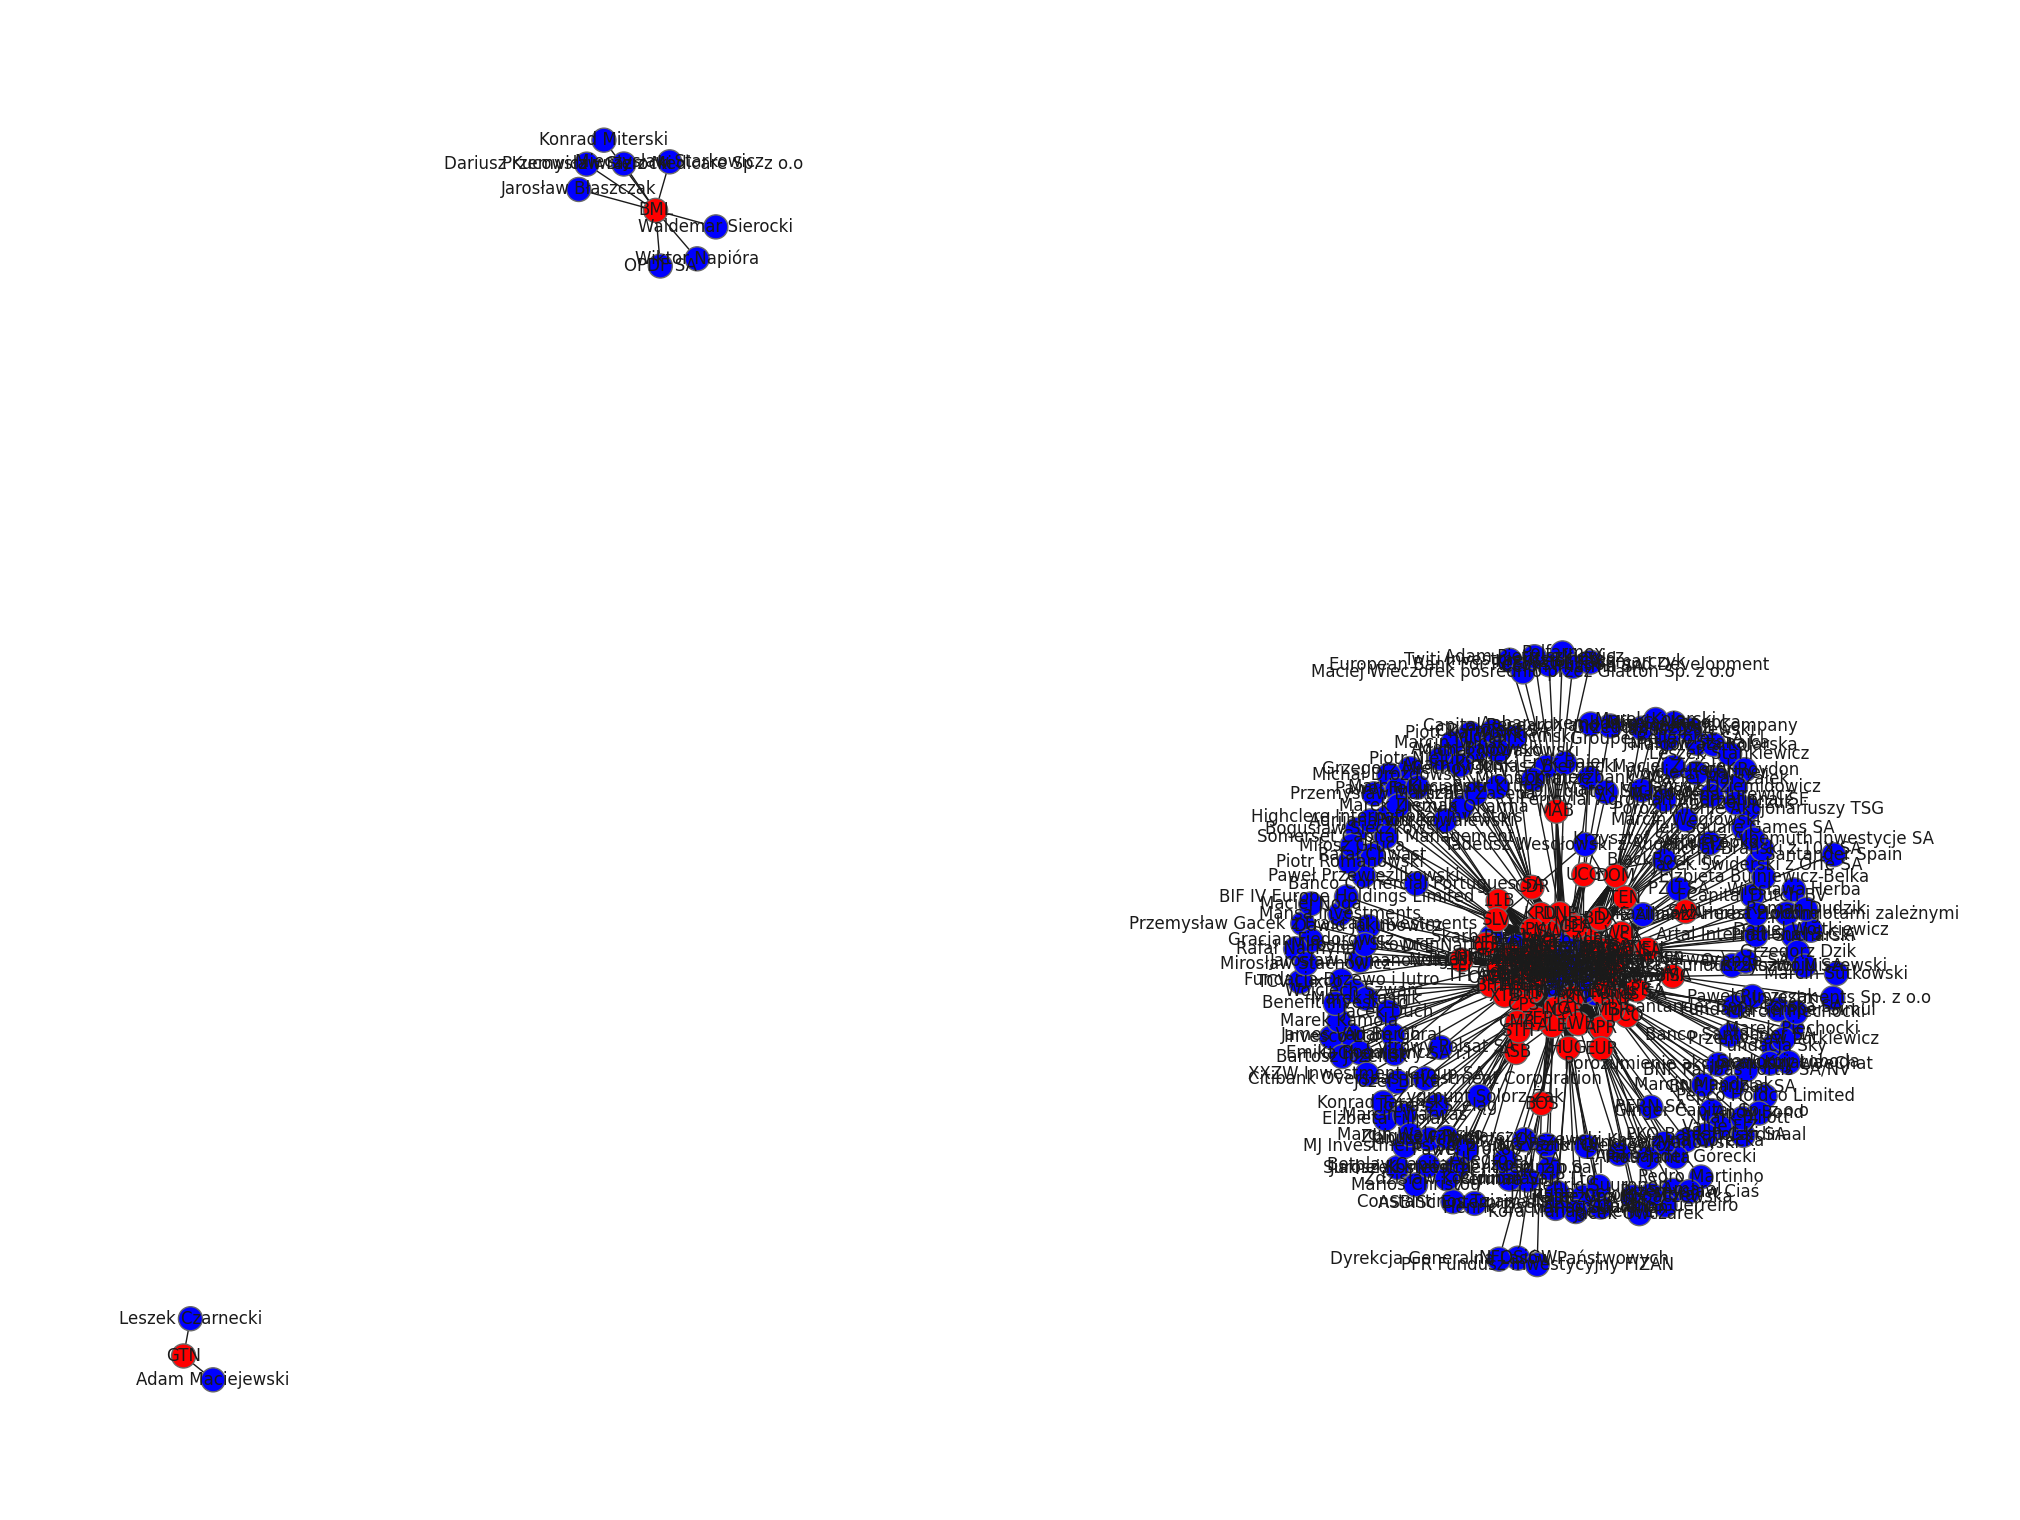

In [ ]:
plt.figure(figsize=(20, 15))
nx.draw(G, with_labels=True, node_color=colors, edgecolors='#696969')
plt.show()

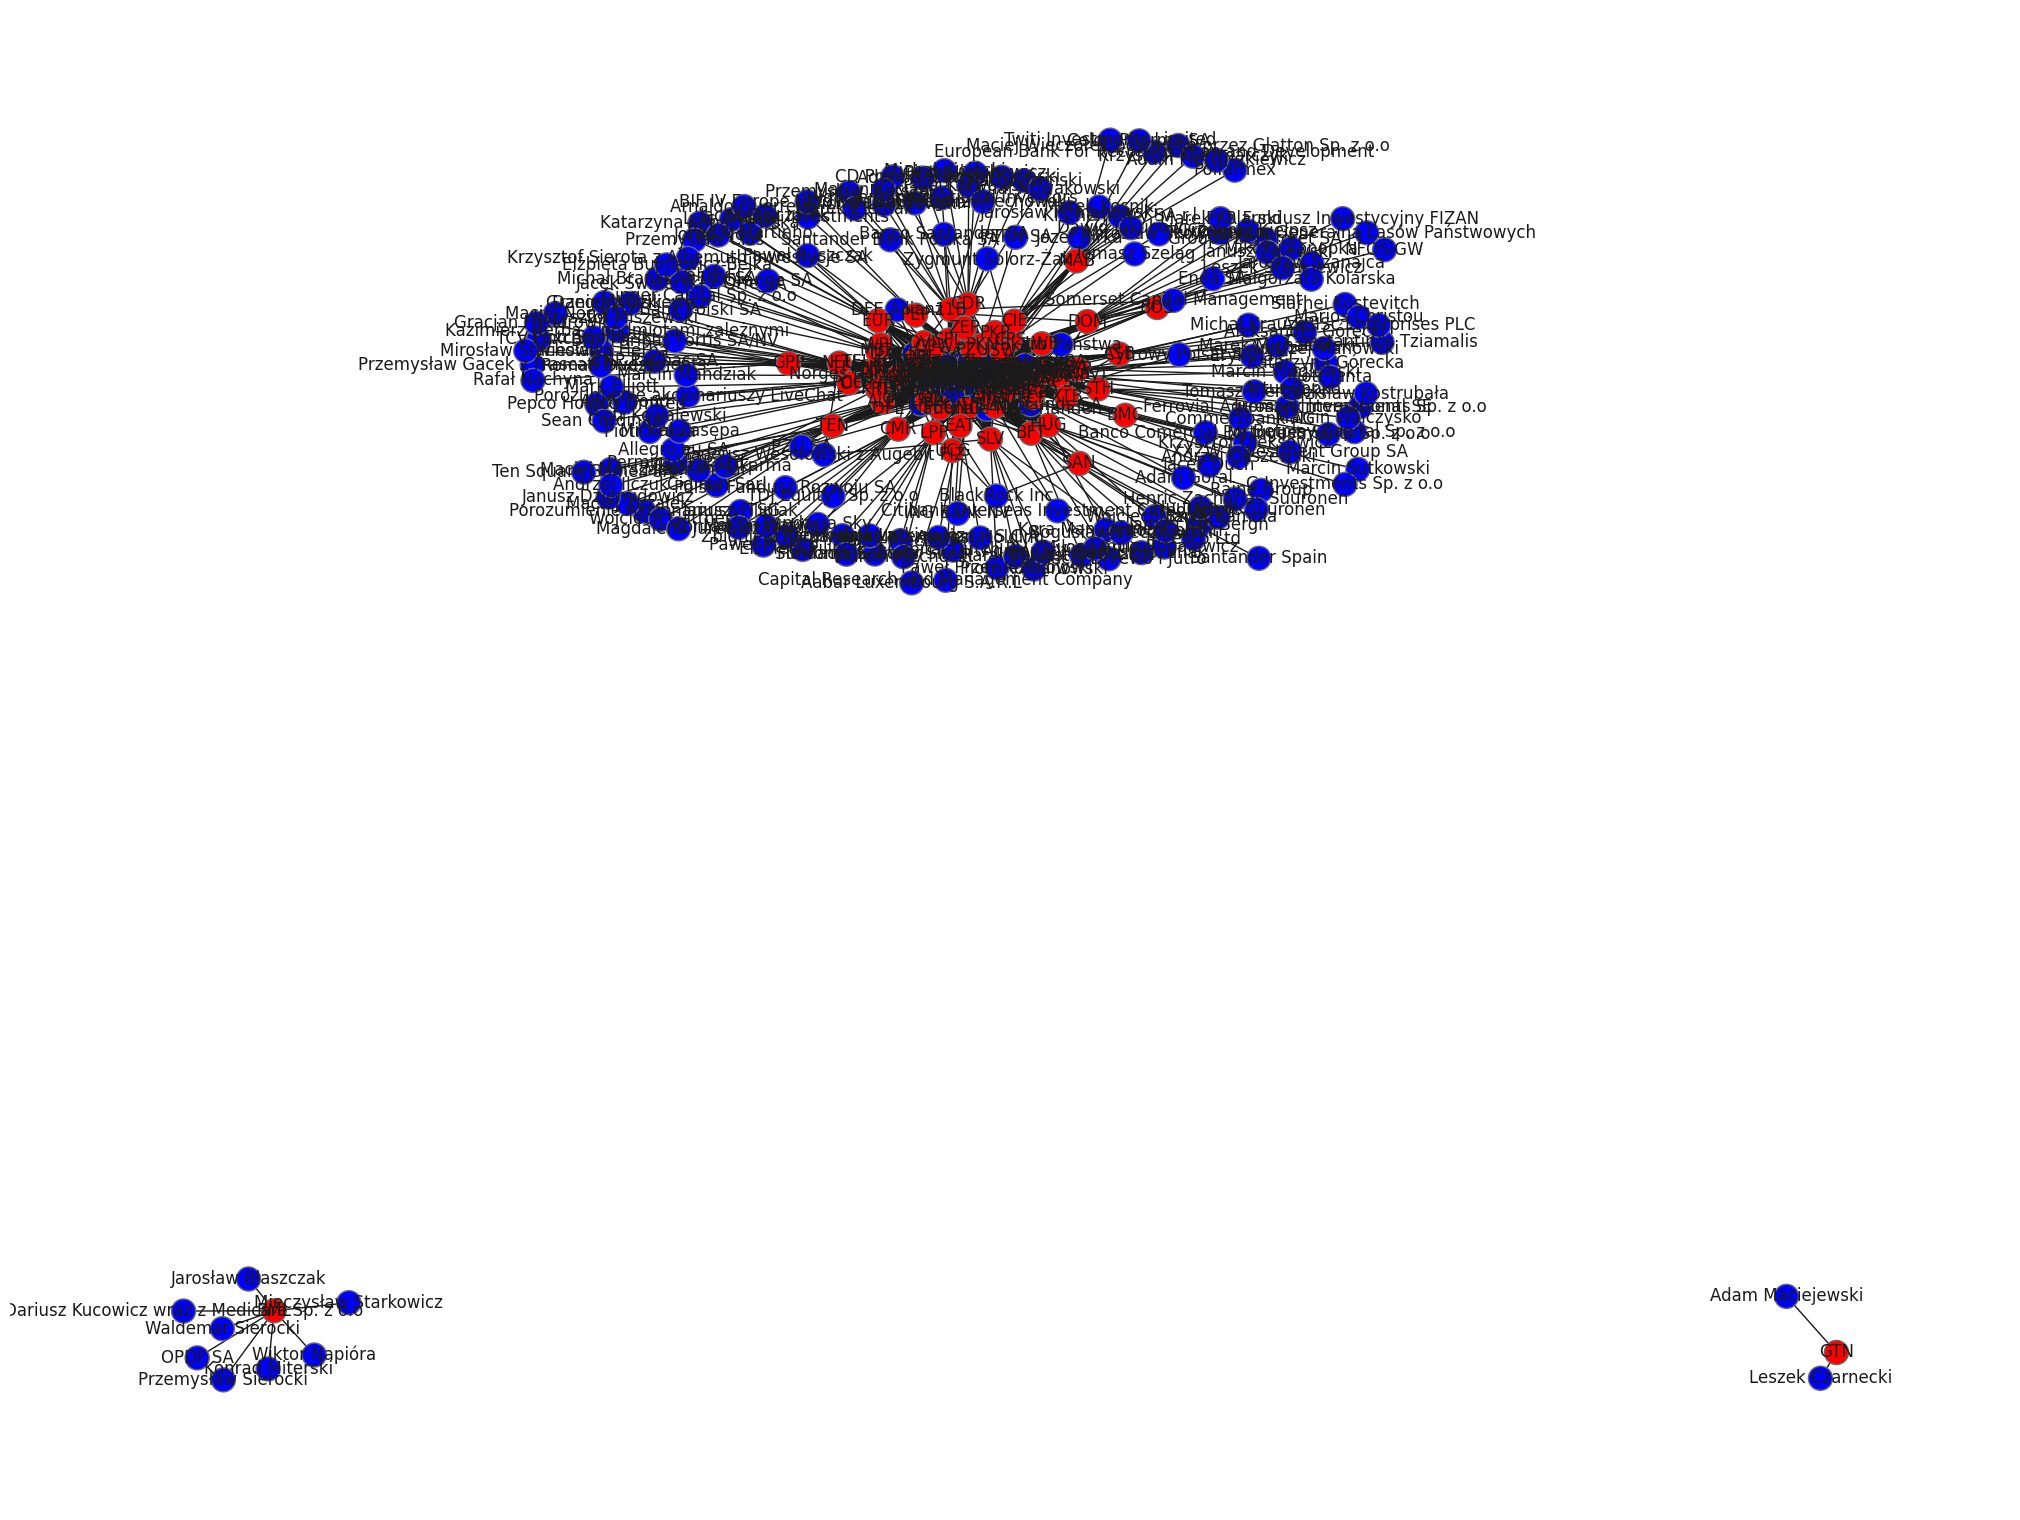

In [ ]:
plt.figure(figsize=(20,15))
nx.draw(G, with_labels=True,
        node_color=colors)

ax = plt.gca()
ax.collections[0].set_edgecolor('#696969')

In [ ]:
# Calculate directed PageRank
pagerank = nx.pagerank(G, weight='Value')

In [ ]:
# Set node sizes based on PageRank values
node_sizes = [pagerank[node] * 5000 for node in G]

In [ ]:
# Set edge widths based on equity values
edge_widths = [data['Value'] / 100000000 for _, _, data in edgelist]

In [ ]:
# Calculate directed PageRank
directed_pagerank = nx.pagerank(G, weight='Value', alpha=0.85)

# Calculate undirected PageRank
undirected_G = G.to_undirected()
undirected_pagerank = nx.pagerank(undirected_G, weight='Value', alpha=0.85)

# Create a DataFrame with the PageRank results
pagerank_table = pd.DataFrame({'Node': list(directed_pagerank.keys()),
                               'Directed_PageRank': list(directed_pagerank.values()),
                               'Undirected_PageRank': list(undirected_pagerank.values())})

# Sort the table by Directed_PageRank in descending order
pagerank_table = pagerank_table.sort_values('Directed_PageRank', ascending=False)

print(pagerank_table)

                          Node  Directed_PageRank  Undirected_PageRank
2    OFE Nationale-Nederlanden           0.032978             0.032978
120                        PKN           0.027761             0.027761
59               Skarb Państwa           0.027320             0.027320
105                        LPP           0.021080             0.021080
60                         PKO           0.018847             0.018847
..                         ...                ...                  ...
208            Przemysław Ciaś           0.000526             0.000526
176               Marek Kosnik           0.000526             0.000526
90               Tomasz Szeląg           0.000526             0.000526
146                Artur Popko           0.000526             0.000526
228            Marcin Mandziak           0.000526             0.000526

[285 rows x 3 columns]


In [ ]:
pagerank_table.to_csv('pagerank_table.csv', index=False)

In [ ]:
# Create a directed graph (DiGraph)
G = nx.from_pandas_edgelist(combined_table, 'Akcjonariusz', 'company', edge_attr='Value', create_using=nx.DiGraph())

# Calculate in-degree and out-degree
in_degree = G.in_degree(weight='Value')
out_degree = G.out_degree(weight='Value')

# Create a DataFrame with the degree results
degree_table = pd.DataFrame({'Node': list(G.nodes()),
                             'In-Degree': list(dict(in_degree).values()),
                             'Out-Degree': list(dict(out_degree).values())})

# Sort the table by In-Degree in descending order
degree_table = degree_table.sort_values('In-Degree', ascending=False)

print(degree_table)

                                   Node      In-Degree    Out-Degree
67                                  UCG  2118160000000             0
120                                 PKN  1666419000000             0
105                                 LPP  1353823000000             0
56                                  PEO  1334265000000             0
60                                  PKO  1119231000000             0
..                                  ...            ...           ...
110               Przemysław Lutkiewicz              0     444000000
111                     Sławomir Łoboda              0     420000000
112                           Orange SA              0  489000000000
114                Pepco Holdco Limited              0  190000000000
142  Ferrovial Agroman International SE              0  430000000000

[285 rows x 3 columns]


In [ ]:
# Create an undirected graph (Graph)
G = nx.from_pandas_edgelist(combined_table, 'Akcjonariusz', 'company', create_using=nx.Graph())

# Set weight of each edge to 1
for u, v, d in G.edges(data=True):
    d['weight'] = 1

# Calculate PageRank (undirected)
undirected_pagerank = nx.pagerank(G, weight='weight')

# Create a DataFrame with the undirected PageRank results
undirected_pagerank_table = pd.DataFrame(list(undirected_pagerank.items()), columns=['Node', 'Undirected PageRank'])

# Sort the table by Undirected PageRank in descending order
undirected_pagerank_table = undirected_pagerank_table.sort_values('Undirected PageRank', ascending=False)

print(undirected_pagerank_table)

                                         Node  Undirected PageRank
160                                       BML             0.014791
18                                 TFI PZU SA             0.014147
2                   OFE Nationale-Nederlanden             0.013958
12                                 TFI PKO SA             0.013899
9               TFI NN Investment Partners SA             0.013341
..                                        ...                  ...
34   Citibank Overseas Investment Corporation             0.000740
52                             Commerzbank AG             0.000737
112                                 Orange SA             0.000737
54               Banco Comercial Portugues SA             0.000736
121                                   PERN SA             0.000736

[285 rows x 2 columns]


In [ ]:
G = nx.from_pandas_edgelist(combined_table, 'Akcjonariusz', 'company', edge_attr='Value', create_using=nx.DiGraph())
# Create a DataFrame with the degree results
degree_table = pd.DataFrame({'Node': list(G.nodes())})

# Calculate the in-degree and out-degree indicators
degree_table['In-Degree'] = degree_table['Node'].apply(lambda x: sum([1 for _, _, edge in G.in_edges(x, data=True)]) if G.in_degree(x) > 0 else 0)
degree_table['Out-Degree'] = degree_table['Node'].apply(lambda x: sum([1 for _, _, edge in G.out_edges(x, data=True)]) if G.out_degree(x) > 0 else 0)

# Sort the table by In-Degree in descending order
degree_table = degree_table.sort_values('In-Degree', ascending=False)

print(degree_table)

                                   Node  In-Degree  Out-Degree
148                                 BFT         41           0
105                                 LPP         40           0
79                                  CDR         37           0
97                                  KRU         35           0
92                                  DNP         35           0
..                                  ...        ...         ...
110               Przemysław Lutkiewicz          0           1
111                     Sławomir Łoboda          0           1
112                           Orange SA          0           1
114                Pepco Holdco Limited          0           1
142  Ferrovial Agroman International SE          0           1

[285 rows x 3 columns]


In [ ]:
degree_table.to_csv('degree_table.csv', index = False, encoding='utf-8')